In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
%matplotlib inline

In [29]:
df = pd.read_csv('Desktop/Thinkful/StudentsPerformance.csv')
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [27]:
#for col in df[['math score', 'reading score', 'writing score']]:
#    df[col] = df[col].fillna(df[col].mean(), inplace=True)


## 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?


### Gender

In [33]:
df.groupby("gender")[["math score", "reading score", "writing score"]].mean()


,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


let's use the t-test to learn whether the differences are statistically significant:

In [47]:
# Test whether group differences are significant.
gender = df["gender"].unique()
grouped_df = df.groupby("gender")
for var in ["math score", "reading score", "writing score"]:
    print("\n\n------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(gender)):
        for j in range(i+1, len(gender)):
            print("t-test between groups {0} and {1}:".format(gender[i], gender[j]))
            print(stats.ttest_ind(
                df[df["gender"]==gender[i]][var], 
                df[df["gender"]==gender[j]][var]
            ))



------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)


------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)


------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)


As we can see, males are better in math but females are better in reading and writing. The t-tests justify that the differences are statistically significant.

### Ethnicity

In [37]:
df.groupby("race/ethnicity")[["math score", "reading score", "writing score"]].mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [48]:
# Test whether group differences are significant.
race = df["race/ethnicity"].unique()
grouped_df = df.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("\n\n------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(race)):
        for j in range(i+1, len(race)):
            print("t-test between groups {0} and {1}:".format(race[i], race[j]))
            print(stats.ttest_ind(
                df[df["race/ethnicity"]==race[i]][var], 
                df[df["race/ethnicity"]==race[j]][var]
            ))



------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D

### Parental level of education 

In [38]:
df.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [49]:
# Test whether group differences are significant.
parents = df["parental level of education"].unique()
grouped_df = df.groupby("parental level of education")
for var in ["math score", "reading score", "writing score"]:
    print("\n\n------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(parents)):
        for j in range(i+1, len(parents)):
            print("t-test between groups {0} and {1}:".format(parents[i], parents[j]))
            print(stats.ttest_ind(
                df[df["parental level of education"]==parents[i]][var], 
                df[df["parental level of education"]==parents[j]][var]
            ))



------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degre

## 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?


In [50]:
df.groupby("lunch")[["math score", "reading score", "writing score"]].mean()


,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [53]:
ttest_ind(df[df.lunch == 'free/reduced'][["math score", "reading score", "writing score"]], df[df.lunch == 'standard'][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-11.83718047,  -7.45105647,  -8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

Students who get a standard lunch a more successful on exams. 

## 3. Does the test preparation course seem to have an effect on the exam performances?


In [54]:
df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [55]:
ttest_ind(df[df['test preparation course'] == 'completed'][["math score", "reading score", "writing score"]], df[df['test preparation course'] == 'none'][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

## 4. Which 2 exam scores are most correlated with each other?

In [56]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


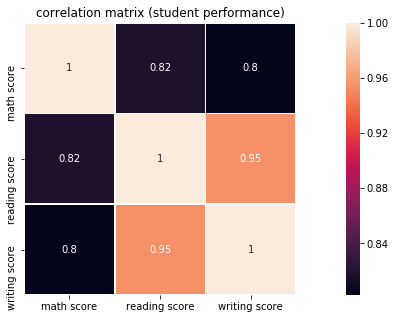

In [57]:
# make the correlation matrices.

corrmat_student = df.corr()

# heatmaps are a great way to get 
# a quick visual read on a big correlation matrix.

plt.figure(figsize=(18,5))

# draw the heatmap using seaborn.
sns.heatmap(corrmat_student, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (student performance)")

plt.show()

# try to match the correlation numbers 
# to the scatterplots above to get a 
# sense of what each magnitude of 
# correlation can look like.



Reading and writing are more correlated than any other combination.